In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('data.csv',delimiter='\t')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [3]:
print('Shape',data.shape)
print('Attributes',data.columns)

Shape (39775, 172)
Attributes Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)


### Removing Features

<ul>
    <li>Q1E to Q42E</li>
    <li>Q1I to Q42I</li>
    <li>VCL1 to VCL16</li>
    <li>TIPI1 to TIPI10</li>
</ul>

In [4]:
data_1 = data.copy()

#list of removed features
removedFeatures = [f'Q{i}E' for i in range(1, 43)] # add feature 'Q1E' to 'Q42E' to be removed
removedFeatures.extend([f'Q{i}I' for i in range(1, 43)]) # add feature 'Q1I' to 'Q42I' to be removed
removedFeatures.extend([f'VCL{i}' for i in range(1, 17)]) # add feature 'VCL1' to 'VCL16' to be removed
removedFeatures.extend([f'TIPI{i}' for i in range(1, 11)]) # add feature 'TIPI1' to 'TIPI10' to be removed

#remove features from the dataset
data_2 = data_1.drop(removedFeatures, axis=1)

print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 62)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country', 'source',
       'introelapse', 'testelapse', 'surveyelapse', 'education', 'urban',
       'gender', 'engnat', 'age', 'screensize', 'uniquenetworklocation',
       'hand', 'religion', 'orientation', 'race', 'voted', 'married',
       'familysize', 'major'],
      dtype='object')


#### Also remove these features as they are extra infomation collected with the survey and has no effect to person for being depressed

<ul>
    <li>country</li>
    <li>source</li>
    <li>introelapse--->The time spent on the introduction/landing page</li>
    <li>testelapse--->The time spent on all the DASS questions</li>
    <li>surveyelapse--->The time spent answering the rest of the demographic and survey questions</li>
    <li>urban</li>
    <li>engnat</li>
    <li>screensize</li>
    <li>uniquenetworklocation</li>
    <li>hand</li>
    <li>religion</li>
    <li>orientation</li>
    <li>race</li>
    <li>voted</li>
    <li>familysize</li>
    <li>major</li>
</ul>

In [5]:
data_3 = data_2.copy()

#removing columns
removedColumns = ['country','source','introelapse', 'testelapse', 'surveyelapse','urban','engnat','screensize', 'uniquenetworklocation',
       'hand', 'religion', 'orientation', 'race', 'voted','familysize', 'major']

#remove columns from the dataset
data_4 = data_3.drop(removedColumns, axis=1)

print('Shape',data_4.shape)
print('Attributes',data_4.columns)

Shape (39775, 46)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'education', 'gender', 'age',
       'married'],
      dtype='object')


In [6]:
data_4.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,education,gender,age,married
0,4,4,2,4,4,4,4,4,2,1,...,1,2,4,3,4,4,2,2,16,1
1,4,1,2,3,4,4,3,4,3,2,...,4,2,2,1,2,2,2,2,16,1
2,3,1,4,1,4,3,1,3,2,4,...,4,4,2,2,1,4,2,2,17,1
3,2,3,2,1,3,3,4,2,3,3,...,2,1,3,4,4,2,1,2,13,1
4,2,2,3,4,4,2,4,4,4,3,...,3,3,3,4,4,3,3,2,19,1


In [7]:
def condition(x):
    if x<=10:
        return 'Under 10'
    elif 10<=x<=16:
        return 'Primary Children'
    elif 17<=x<=21:
        return 'Secondary Children'
    elif 21<=x<=35:
        return 'Adults'
    elif 36<=x<=48:
        return 'Elder Adults'
    else:
        return 'Older People'
    
data_4['Age_Groups'] = data_4['age'].apply(condition)
data_4.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q38A,Q39A,Q40A,Q41A,Q42A,education,gender,age,married,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,2,4,3,4,4,2,2,16,1,Primary Children
1,4,1,2,3,4,4,3,4,3,2,...,2,2,1,2,2,2,2,16,1,Primary Children
2,3,1,4,1,4,3,1,3,2,4,...,4,2,2,1,4,2,2,17,1,Secondary Children
3,2,3,2,1,3,3,4,2,3,3,...,1,3,4,4,2,1,2,13,1,Primary Children
4,2,2,3,4,4,2,4,4,4,3,...,3,3,4,4,3,3,2,19,1,Secondary Children


In [8]:
new_data=data_4.iloc[:,42:]
data_5=data_4.filter(regex='Q\d{1,2}A') #Regular Expressions
data_5.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


#### Select Depression questions

In [9]:
def sub(data_5):
    return data_5.subtract(1,axis=1)
data_5=sub(data_5)
DASS_keys = [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]
Dep = []
for i in DASS_keys:
    Dep.append(f'Q{str(i)}A')
depression= data_5.filter(Dep)

#### Scoring as per given answers for the respective set of Depression questions

In [10]:
col=list(depression)
depression['Total_Count']=depression[col].sum(axis=1)
depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


#### After scoring is done combining this set back with the the rest of the table

In [11]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,education,gender,age,married,Age_Groups
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,2,2,16,1,Primary Children
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,2,2,16,1,Primary Children
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,2,17,1,Secondary Children
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,1,2,13,1,Primary Children
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,3,2,19,1,Secondary Children


#### Handle Null Values

<AxesSubplot:>

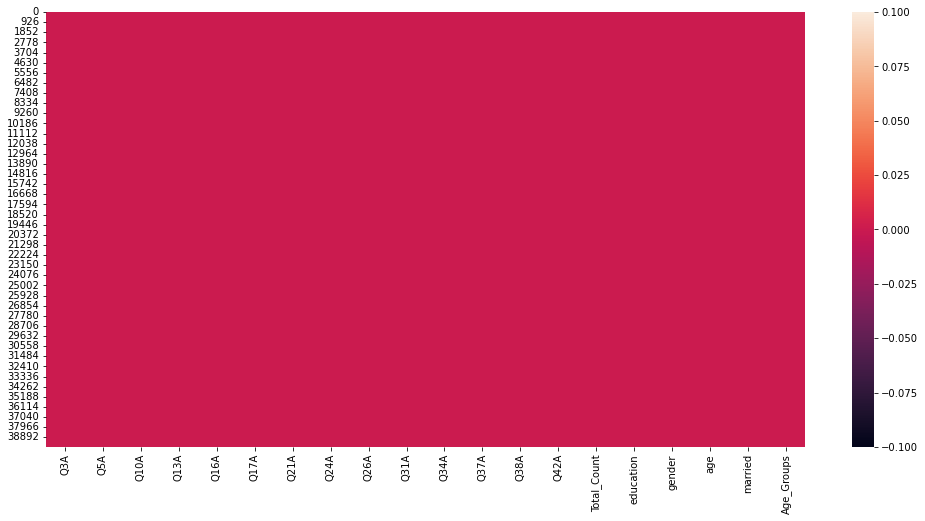

In [12]:
plt.figure(figsize=(17, 8))
sb.heatmap(Depression.isnull())

In [13]:
Depression.isnull().sum()

Q3A            0
Q5A            0
Q10A           0
Q13A           0
Q16A           0
Q17A           0
Q21A           0
Q24A           0
Q26A           0
Q31A           0
Q34A           0
Q37A           0
Q38A           0
Q42A           0
Total_Count    0
education      0
gender         0
age            0
married        0
Age_Groups     0
dtype: int64

In [14]:
def condition(x) :
    if x<=9:
        return 'Normal'
    elif 10<=x<=13:
        return 'Mild'
    elif 14<=x<=20:
        return 'Moderate'
    elif 21<=x<=27:
        return 'Severe'
    else:
        return 'Extremely Severe'

Depression['Condition'] = Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,Q37A,Q38A,Q42A,Total_Count,education,gender,age,married,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,0,1,3,27,2,2,16,1,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,3,1,1,24,2,2,16,1,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,3,3,3,39,2,2,17,1,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,1,0,1,16,1,2,13,1,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,2,2,2,32,3,2,19,1,Secondary Children,Extremely Severe


C:\Users\Lahiru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'People Condition of Depression Level')

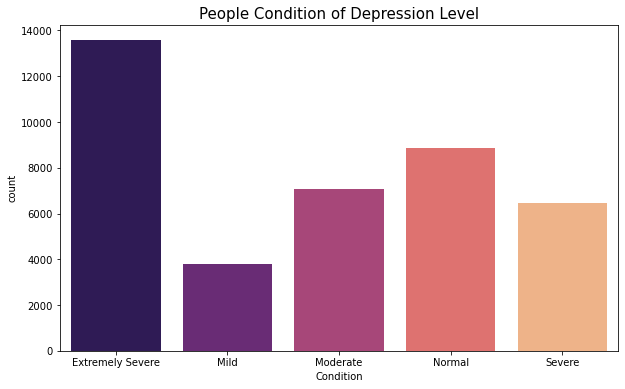

In [15]:
plt.figure(figsize=(10,6))
sb.countplot(Depression.sort_values('Condition').Condition,palette='magma')
plt.title('People Condition of Depression Level',fontsize=15)

### Analysis Step

#### 1. Education Feature

<ul>
    <li>1=Less than high school</li>
    <li>2=High school</li>
    <li>3=University degree</li>
    <li>4=Graduate degree</li>
</ul>

In [16]:
print('Counts of answered recorded as per the Education \n',Depression['education'].value_counts())

Counts of answered recorded as per the Education 
 3    15120
2    15066
4     5008
1     4066
0      515
Name: education, dtype: int64


C:\Users\Lahiru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Depression Condition as per different Education levels')

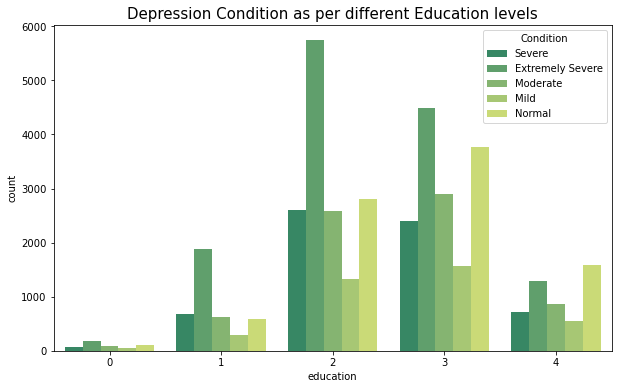

In [17]:
plt.figure(figsize=(10,6))
sb.countplot(Depression.sort_values('education').education,hue=Depression['Condition'],palette='summer')
plt.title('Depression Condition as per different Education levels',fontsize=15)

#### 2.Age Groups

<ul>
    <li>Under 10</li>
    <li>Primary(10-16)</li>
    <li>Secondary(17-21)</li>
    <li>Adults(21-35)</li>
    <li>Elder Adults(36-48)</li>
    <li>Older people(49+)</li>
</ul>

In [18]:
print('Counts of answered recorded as per age groups\n',Depression['Age_Groups'].value_counts())

Counts of answered recorded as per age groups
 Secondary Children    16189
Adults                15388
Primary Children       4960
Elder Adults           2082
Older People           1156
Name: Age_Groups, dtype: int64


C:\Users\Lahiru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Depression Condition as per different Age Groups')

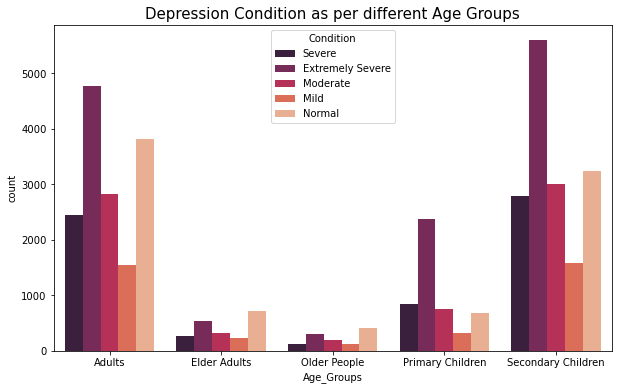

In [19]:
plt.figure(figsize=(10,6))
sb.countplot(Depression.sort_values('Age_Groups').Age_Groups,hue=Depression['Condition'],palette='rocket')
plt.title('Depression Condition as per different Age Groups',fontsize=15)

#### 3.Genders

<ul>
    <li>1=Male</li>
    <li>2=Female</li>
    <li>3=Other</li>
</ul>

In [20]:
print('Count of People participated as of Gender\n',Depression['gender'].value_counts())

Count of People participated as of Gender
 2    30367
1     8789
3      552
0       67
Name: gender, dtype: int64


C:\Users\Lahiru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Depression Condition of Different Gender')

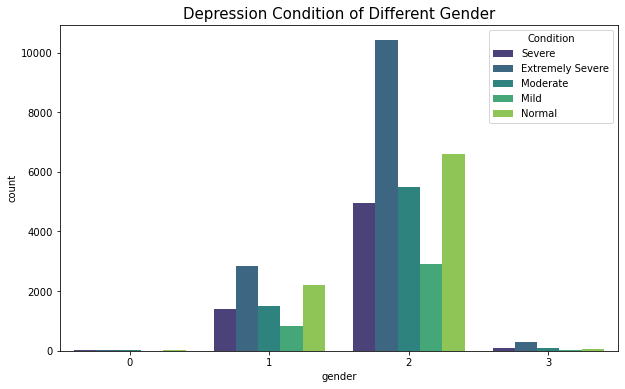

In [21]:
plt.figure(figsize=(10,6))
sb.countplot(Depression.sort_values('gender').gender,hue=Depression['Condition'],palette='viridis')
plt.title('Depression Condition of Different Gender',fontsize=15)

#### 4.Martial Status

<ul>
    <li>1=Never married</li>
    <li>2=Currently married</li>
    <li>3=Previously married</li>
</ul>

In [22]:
print('Count of People participated as of Martial Status\n',Depression['married'].value_counts())

Count of People participated as of Martial Status
 1    34131
2     4357
3     1092
0      195
Name: married, dtype: int64


C:\Users\Lahiru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Depression State of People as of Married or Not')

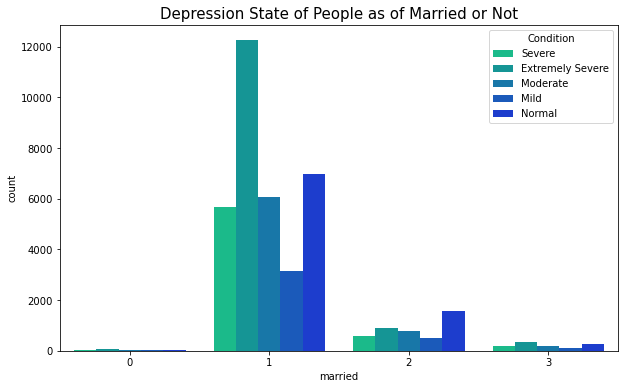

In [23]:
plt.figure(figsize=(10,6))
sb.countplot(Depression.sort_values('married').married,hue=Depression['Condition'],palette='winter_r')
plt.title('Depression State of People as of Married or Not',fontsize=15)

### Changing variables for Correlation

In [24]:
Depr=Depression.copy()
def change_cond(x):
    if x=='Extremely Severe':
        return 4
    elif x=='Severe':
        return 3
    elif x=='Moderate':
        return 2
    elif x=='Mild':
        return 1
    else:
        return 0
    
Depr['Condition']=Depr['Condition'].apply(change_cond)
Depr.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,Q37A,Q38A,Q42A,Total_Count,education,gender,age,married,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,0,1,3,27,2,2,16,1,Primary Children,3
1,1,3,1,3,2,3,1,1,2,1,...,3,1,1,24,2,2,16,1,Primary Children,3
2,3,3,3,3,3,3,3,3,0,3,...,3,3,3,39,2,2,17,1,Secondary Children,4
3,1,2,2,0,1,2,0,0,1,2,...,1,0,1,16,1,2,13,1,Primary Children,2
4,2,3,2,3,2,3,2,1,3,2,...,2,2,2,32,3,2,19,1,Secondary Children,4


In [25]:
def change_age(x):
    if x=='Primary children':
        return 0
    elif  x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    else:
        return 4

Depr['Age_Groups']=Depr['Age_Groups'].apply(change_age)
Depr=Depr.drop(columns=['age','Total_Count'])
Depr.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,education,gender,married,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,2,2,1,4,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,2,2,1,4,3
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,2,2,1,1,4
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,1,2,1,4,2
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,3,2,1,1,4


In [26]:
Depr.describe()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,education,gender,married,Age_Groups,Condition
count,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,1.226097,1.521458,1.447316,1.784538,1.519573,1.658605,1.349591,1.437109,1.658580,1.376820,1.633991,1.373551,1.392759,1.680101,2.503834,1.789541,1.159547,1.952860,2.305041
std,1.038526,1.069908,1.139350,1.073779,1.110826,1.157063,1.166096,1.050809,1.066779,1.043797,1.151208,1.139862,1.187423,1.032528,0.885414,0.444180,0.445882,1.035482,1.555965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000


Model Creation for predictions

In [38]:
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm

In [39]:
labelencoder = LabelEncoder()
dataTransform = Depr.copy()

In [40]:
for i in Depr.columns:
    dataTransform[i] = labelencoder.fit_transform(Depr[i])
    
dataTransform

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,education,gender,married,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,2,2,1,3,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,2,2,1,3,3
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,2,2,1,0,4
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,1,2,1,3,2
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,3,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,3,2,3,3,2,2,3,3,3,3,2,2,1,1,3,4
39771,2,2,3,3,3,2,3,3,3,3,3,2,3,3,3,1,1,0,4
39772,1,0,0,1,0,0,0,1,0,1,0,0,0,0,3,2,2,2,0
39773,1,2,0,3,0,1,1,1,2,1,1,0,1,2,3,2,1,0,2


In [41]:
X = dataTransform.drop(['Condition'], axis=1)
y = dataTransform['Condition']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [45]:
print(X_train.shape,'----> Training Feature shape')
print(X_test.shape,'----> Testing Feature shape')
print(y_train.shape,'----> Training Labels shape')
print(y_test.shape,'----> Testing Labels shape')

(27842, 18) ----> Training Feature shape
(11933, 18) ----> Testing Feature shape
(27842,) ----> Training Labels shape
(11933,) ----> Testing Labels shape


In [46]:
def model_acc(model):
    model.fit(X_train,y_train)
    dep_pred = model.predict(X_test)
    acc = round(sm.accuracy_score(y_test,dep_pred),3)
    print(str(model)+' ---> '+str(acc))

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

RandomForestClassifier() ---> 0.933


In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_acc(dt)

DecisionTreeClassifier() ---> 0.824


In [49]:
from sklearn.svm import SVC
svm = SVC()
model_acc(svm)

SVC() ---> 0.999


In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_acc(nb)

GaussianNB() ---> 0.881


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = {'C':[0.1,1,10],'kernel':['rbf','linear','poly']}

In [53]:
grid_obj = GridSearchCV(estimator=svm, param_grid=parameters)
grid_fit = grid_obj.fit(X_train,y_train)

best_model = grid_fit.best_estimator_
best_model

SVC(C=0.1, kernel='linear')

In [54]:
best_model.score(X_test,y_test)

1.0

In [55]:
import pickle
with open('dep_predictor.pickle','wb') as file:
    pickle.dump(best_model,file)

In [59]:
X_train.columns

Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'education', 'gender',
       'married', 'Age_Groups'],
      dtype='object')

In [62]:
best_model.predict([[1,3,3,3,1,3,2,3,3,2,1,3,2,1,0,3,2,3]])

array([4], dtype=int64)